# DS 4023: Machine Learning
## Spring 2020 Course Project
### BNU-HKBU United International College
**Name:** 徐铂凯 Michael  **ID:** 1730014072

At the time I did the project, the version of the dataset is version5 (2020-03-22). You can use the dataset that I 
used from: https://pan.baidu.com/s/10jq3zpoMFlYYnG8MyZeiDQ , the verification code is: z37y\
Or you can just get the latest dataset from https://www.kaggle.com/austinreese/craigslist-carstrucks-data 

In [1]:
# import the basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb

In [2]:
! conda list basemap

# packages in environment at D:\anaconda3\envs\machinelearning:
#
# Name                    Version                   Build  Channel
basemap                   1.2.0            py37h4e5d7af_0    https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main


In [3]:
df = pd.read_csv('vehicles.csv')
df.shape

(539759, 25)

In [4]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7088746062,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,10299,2012.0,acura,tl,NaN,NaN,...,NaN,NaN,other,blue,https://images.craigslist.org/01414_3LIXs9EO33...,2012 Acura TL Base 4dr Sedan Offered by: B...,NaN,nc,35.7636,-78.7443
1,7088745301,https://greensboro.craigslist.org/ctd/d/bmw-3-...,greensboro,https://greensboro.craigslist.org,0,2011.0,bmw,335,NaN,6 cylinders,...,rwd,NaN,convertible,blue,https://images.craigslist.org/00S0S_1kTatLGLxB...,BMW 3 Series 335i Convertible Navigation Dakot...,NaN,nc,NaN,NaN
2,7088744126,https://greensboro.craigslist.org/cto/d/greens...,greensboro,https://greensboro.craigslist.org,9500,2011.0,jaguar,xf,excellent,NaN,...,NaN,NaN,NaN,blue,https://images.craigslist.org/00505_f22HGItCRp...,2011 jaguar XF premium - estate sale. Retired ...,NaN,nc,36.1032,-79.8794
3,7088743681,https://greensboro.craigslist.org/ctd/d/cary-2...,greensboro,https://greensboro.craigslist.org,3995,2004.0,honda,element,NaN,NaN,...,fwd,NaN,SUV,orange,https://images.craigslist.org/00E0E_eAUnhFF86M...,2004 Honda Element LX 4dr SUV Offered by: ...,NaN,nc,35.7636,-78.7443
4,7074612539,https://lincoln.craigslist.org/ctd/d/gretna-20...,lincoln,https://lincoln.craigslist.org,41988,2016.0,chevrolet,silverado k2500hd,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00S0S_8msT7RQquO...,"Shop Indoors, Heated Showroom!!!www.gretnaauto...",NaN,ne,41.1345,-96.2458


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539759 entries, 0 to 539758
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            539759 non-null  int64  
 1   url           539759 non-null  object 
 2   region        539759 non-null  object 
 3   region_url    539759 non-null  object 
 4   price         539759 non-null  int64  
 5   year          538772 non-null  float64
 6   manufacturer  516175 non-null  object 
 7   model         531746 non-null  object 
 8   condition     303707 non-null  object 
 9   cylinders     321264 non-null  object 
 10  fuel          536366 non-null  object 
 11  odometer      440783 non-null  float64
 12  title_status  536819 non-null  object 
 13  transmission  535786 non-null  object 
 14  vin           315349 non-null  object 
 15  drive         383987 non-null  object 
 16  size          168550 non-null  object 
 17  type          392290 non-null  object 
 18  pain

In [6]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

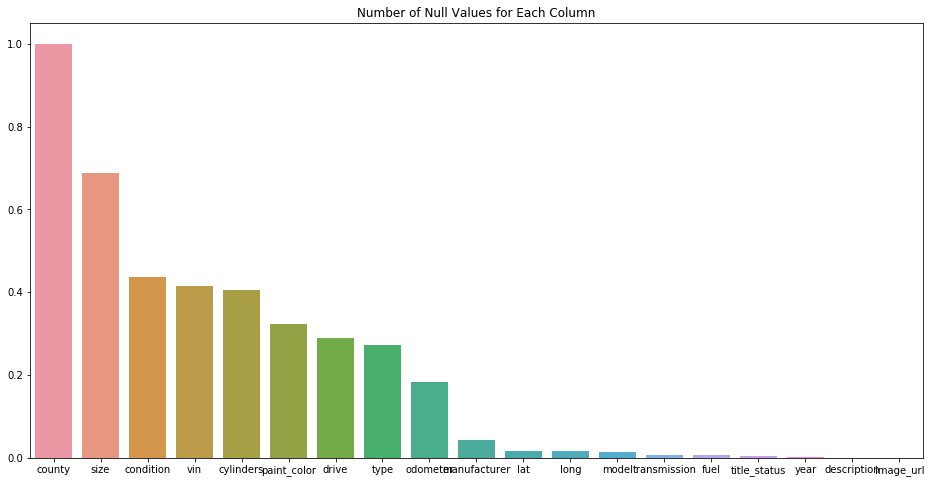

In [7]:
# plot the percentage of missing values
null = sorted(df.isnull().sum() / df.shape[0],reverse = True)  # sort the summation of missing value for each col
null = [i for i in null if i != 0]
index = [i[0] for i in sorted(enumerate(df.isnull().sum()), key=lambda x:x[1], reverse=True)] # get the sorted index
col_name = df.columns[index[0:19]] # get the col name
plt.figure(figsize=(16,8))
snb.barplot(x = col_name, y = null)
# plt.savefig('../Report/figures/1.png')
plt.title('Number of Null Values for Each Column')
plt.show()

## Data Cleaning
### drop some unnecessary columns
From data description in the original website, we could see that some columns are meaningless, as they only
contain some infomation about the URL and general description of the car, so these columns can be dropped.
The target dropped columns for this reason includes:
1. **id**: entry id
2. **url**: listing URL
3. **region_url**: region URL
4. **image_url**: image URL
5. **description**: listed description of vehicle
6. **vin**: vehicle identification number
7. **title_status**: title status of vehicles
8. **model**: the specific car type for each manufacture, it's rare for a customer to see this attribute when buying either new
car or used cars

And from the above missing data plot, we could see that percentage of missing data in some columns 
are greater than 0.5, which means that most of the data are irrelavent and unuseful, so we can simply
remove these columns. The qulified colunmns are: **county(100%)** and **size(68.77%)**

In [8]:
drop_col = ['id','url','region_url','image_url','description','vin',
           'county','size','title_status','model']
df_new = df.drop(columns= drop_col)

In [9]:
# First of all, let's see the distribution of target variable: price
print(f"Maximum price: {df_new['price'].max()} $\nMinimum price: {df_new['price'].min()} $")
# As we can see that the price seems higher enough and lower enough, so we filter the prices between 500 and 100000
df_new = df_new[(df_new['price']>=500) & (df_new['price']<=40000)]
# drop the nan-columns values
df_new = df_new.dropna(subset=['price'])
print(f'shape of new dataframe is: {df_new.shape}')

Maximum price: 4294967295 $
Minimum price: 0 $
shape of new dataframe is: (472966, 15)


In [10]:
# handle the missing data of cylinders
# Cylinder column contains a text in the form of: number + "cylinders". 
# This can be changed to integer for easier analysis.
# If number of cylinders is not specified I will mark it as -1.
import re
def cylinders(row):
    str1 = '10 cylinders'
    str2 = '12 cylinders'
    if type(row["cylinders"]) is str:
        if row['cylinders'].strip() != str1.strip():
            if row['cylinders'].strip() != str2.strip():
                cyl = re.findall(r"(\d) cylinders", row["cylinders"])
                if len(cyl) != 0:
                    return int(cyl[0])
                else: # for other
                    return 1
            else:
                return 12
        else:
            return 10
        # for none values
    else:
        return -1
        
df_new["cylinders"] = df_new.apply(cylinders,axis=1)

In [11]:
# handle other catogorical values
temp = ['region','manufacturer','condition','fuel','transmission','drive','type','paint_color']
for i in temp:
    df_new[i] = df_new[i].fillna('unknown')
# handle the years if missing, then drop it
df_new = df_new.dropna(subset=['year'])
# print(f'shape of new dataframe is: {df_new.shape}')
# handle the odometer
df_new['odometer'] = df_new['odometer'].fillna(df_new['odometer'].mean())
print(f'shape of new dataframe is: {df_new.shape}')

shape of new dataframe is: (472334, 15)


In [12]:
df_new.isnull().sum()

region             0
price              0
year               0
manufacturer       0
condition          0
cylinders          0
fuel               0
odometer           0
transmission       0
drive              0
type               0
paint_color        0
state              0
lat             3864
long            3864
dtype: int64

## EDA
At this point, missing values 没了，虽说还有Lat, Long,但无所谓，下面画图需要

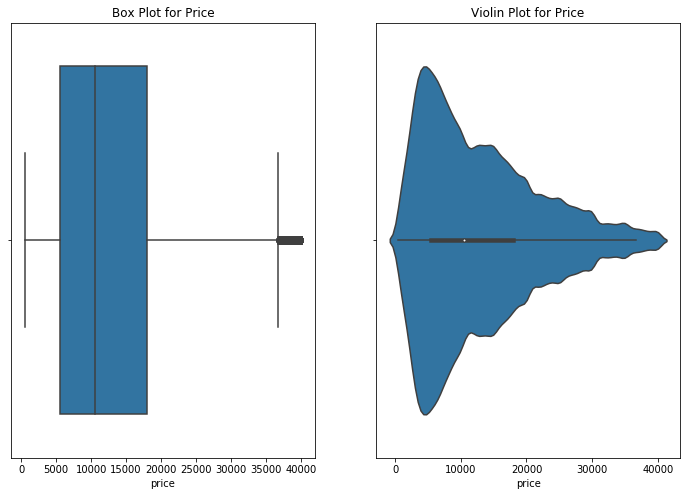

In [13]:
# plot the distribution of price
plt.subplots(1,2,figsize=(12,8))
plt.subplot(1,2,1)
snb.boxplot(df_new['price'])
plt.title('Box Plot for Price')
plt.subplot(1,2,2)
snb.violinplot(df_new['price'])
plt.title('Violin Plot for Price')
plt.show()

Next is to plot the locations 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


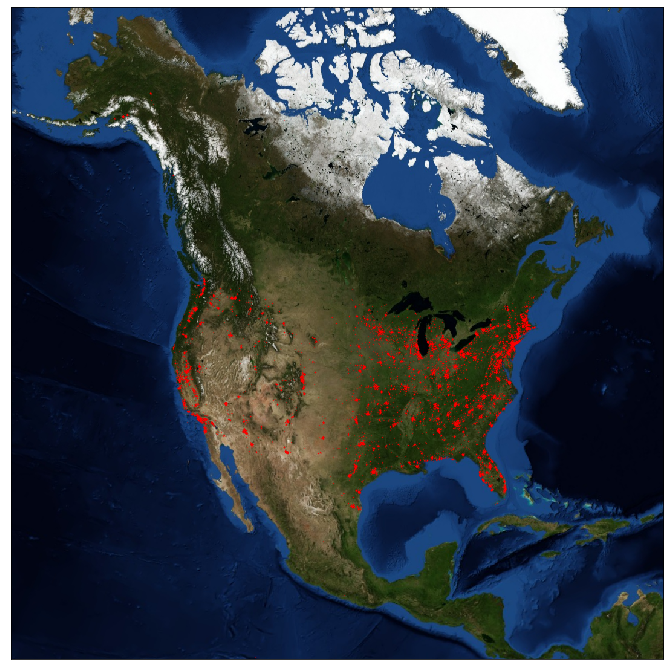

In [14]:
# Base Map
from mpl_toolkits.basemap import Basemap
df_sample = df_new.sample(20000, replace=False) # randomly select 20000 rows of original data without replacement
figure = plt.figure(figsize=(16,12))
m = Basemap(projection='lcc', resolution=None, # Lambert Conformal projection
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.bluemarble()

for index, row in df_sample.iterrows():
    lattitude = row['lat']
    longtitude = row['long']
    x,y = m(longtitude, lattitude)
    m.plot(x,y,'.',markersize=0.3,c="red")
plt.savefig('../Report/figures/2.png')

Next is for ohter attributes 

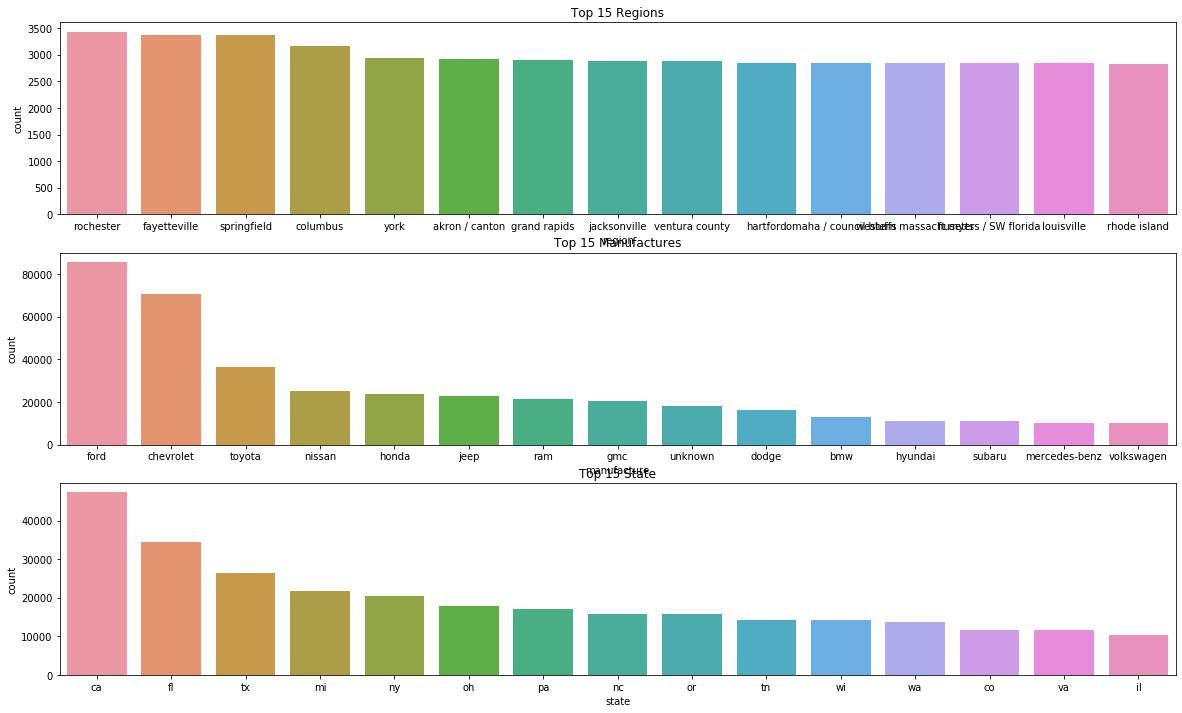

In [17]:
plt.subplots(3,1,figsize=(20,12))
# region
region_top15 = df_new['region'].value_counts().iloc[:15]
regions = pd.DataFrame({'region': region_top15.index, 'count': region_top15.values})
plt.subplot(3,1,1)
ax = snb.barplot(x='region',y='count',data=regions, order=regions['region']);
plt.title('Top 15 Regions')
# manufacture
manu_top15 = df_new['manufacturer'].value_counts().iloc[:15]
manus = pd.DataFrame({'manufacture': manu_top15.index, 'count': manu_top15.values})
plt.subplot(3,1,2)
ax = snb.barplot(x='manufacture',y='count',data=manus, order=manus['manufacture']);
plt.title('Top 15 Manufactures')
# State
state_top15 = df_new['state'].value_counts().iloc[:15]
state = pd.DataFrame({'state': state_top15.index, 'count': state_top15.values})
plt.subplot(3,1,3)
ax = snb.barplot(x='state',y='count',data=state, order=state['state']);
plt.title('Top 15 State')
# plt.savefig('../Report/figures/3.png')
plt.show()

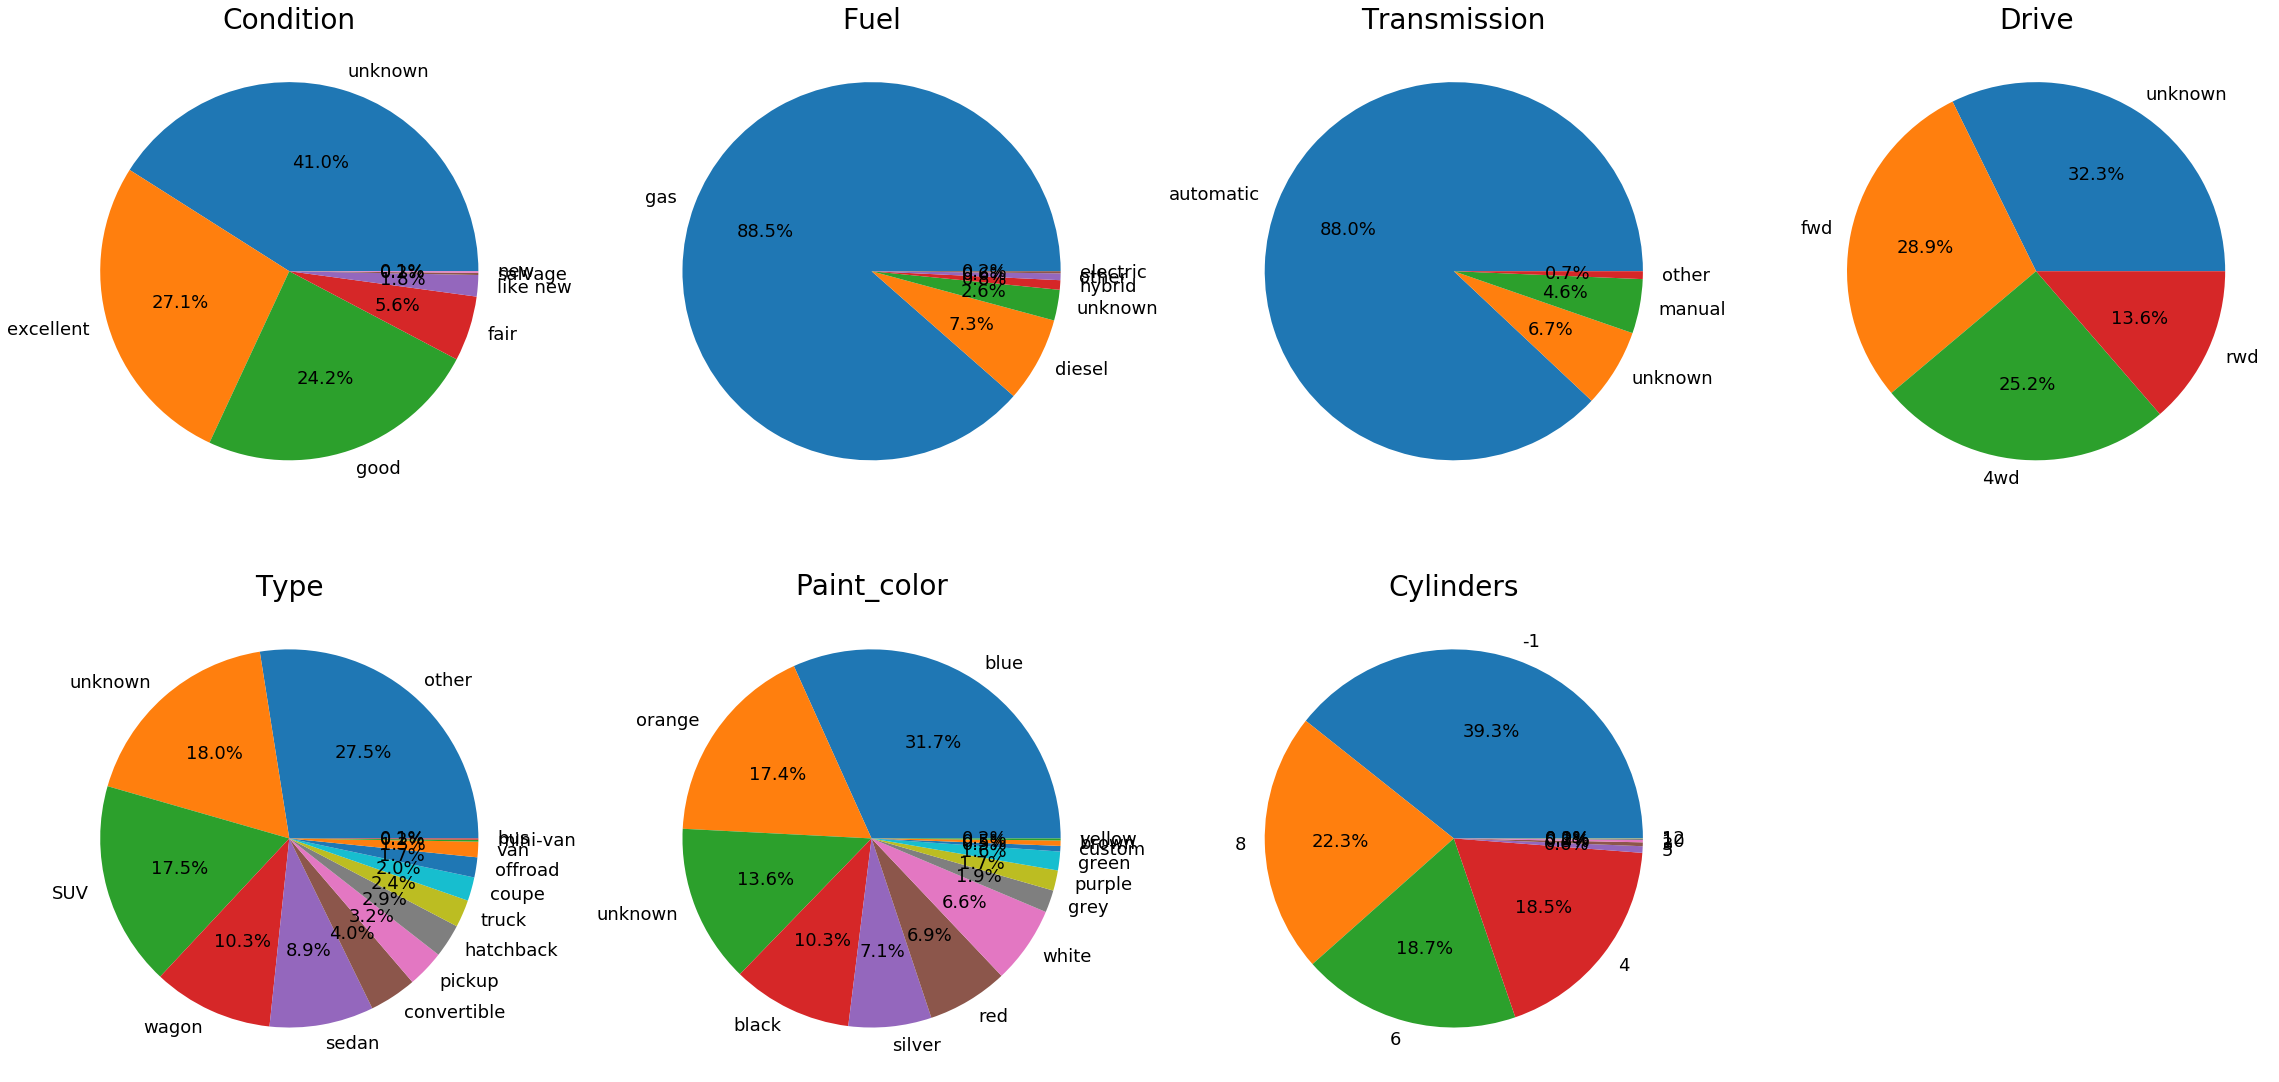

In [18]:
# Visualize transmission, fuel, condition, and cylinders with pyplot
temp = ['condition','fuel','transmission','drive','type','paint_color','cylinders']
fig = plt.figure(figsize = (40,40))
axes = 440
for t in temp:
    axes += 1
    fig.add_subplot(axes)
    plt.pie(df_new[t].value_counts(), labels=df_new[t].unique(),autopct='%1.1f%%', textprops={'fontsize':18});
    plt.title(t[0].upper()+t[1:],fontdict={'fontsize':28})
# plt.savefig('../Report/figures/4.png')
plt.show()

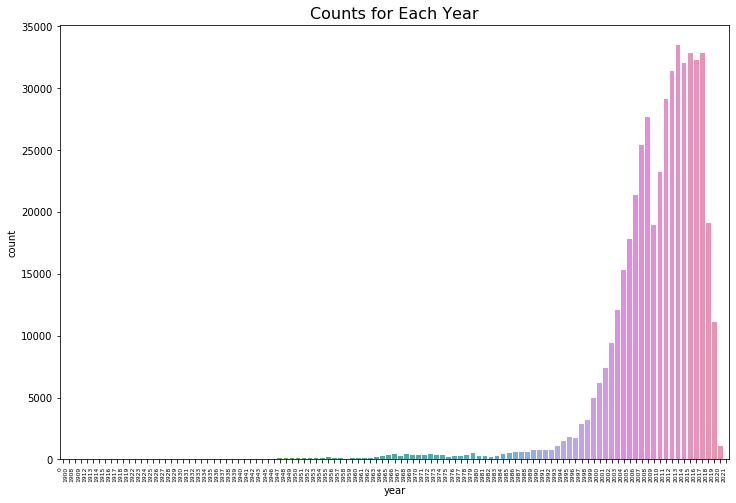

In [27]:
# plot the year
plt.figure(figsize=(12,8))
# convert year from float point to int
temp = []
for i in df_new['year']:
    temp.append(int(i))
temp_df = pd.DataFrame({'year': temp})
ax = snb.countplot(x='year', data = temp_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=6)
plt.title("Counts for Each Year",fontdict={'fontsize':16})
# plt.savefig('../Report/figures/5.png')
plt.show()

By reading through the wikipedia page of Automotive industry in the United States It seems that the car sales grew to large numbers during the 1960s. I will reduce the dataset further here and ignore years <1960. Also, there are some data that are greater than 2020, so also delete this one.

In [28]:
df_new.drop(df_new[df_new['year'] < 1960].index, inplace=True)
df_new.drop(df_new[df_new['year'] > 2020].index, inplace=True)
df_new.shape

(470174, 15)

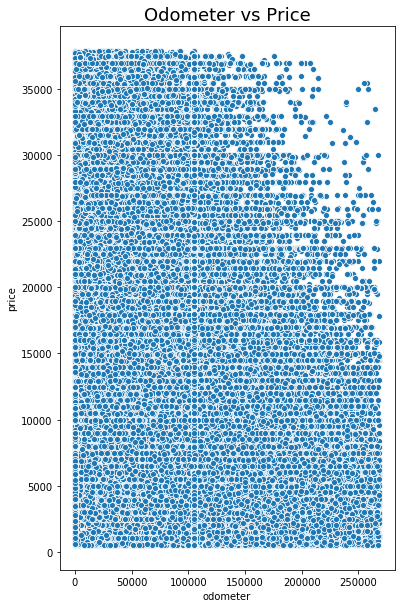

In [30]:
# plot the relation between odemeter and price
temp= df_new[(df_new["odometer"]<df_new["odometer"].quantile(.99)) & 
                      ((df_new["price"]<df_new["price"].quantile(.99)))& ((df_new["price"]>1))]
plt.figure(figsize=(6,10))
snb.scatterplot(x = 'odometer', y = 'price', data = temp)
plt.title('Odometer vs Price',fontdict={'fontsize':18})
# plt.savefig('../Report/figures/6_1.png')
plt.show()

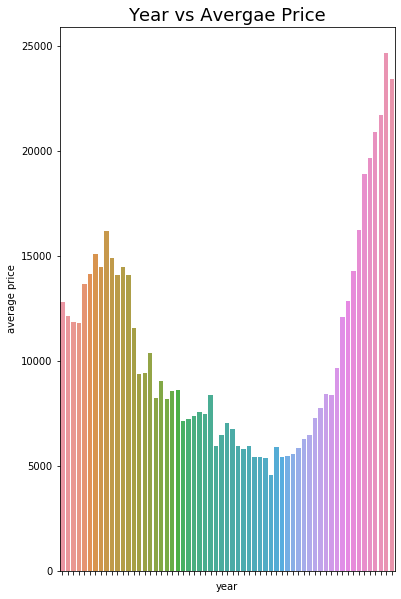

In [33]:
# plot the avg price vs year 
# #identifying outliers:
# price_over_98pct = cars["price"].quantile(.98)

# price_yr_cleaned = cars[(1 < cars["price"]) & (cars["price"] < price_over_98pct) & (cars["year"] != 0) & (cars["year"] != 2020)]

temp = (df_new.groupby(['year'])['price']).mean().sort_values(ascending=False)
# convert year from float point to int
a = []
for i in temp.index:
    a.append(int(i))
temp_df = pd.DataFrame({'year': a ,'average price': temp.values})
plt.figure(figsize=(6,10))
ax = snb.barplot(x='year', y='average price', data = temp_df);
ax.set(xticklabels=[])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);
plt.title("Year vs Avergae Price",fontdict={'fontsize':18});
# plt.savefig('../Report/figures/6_2.png')

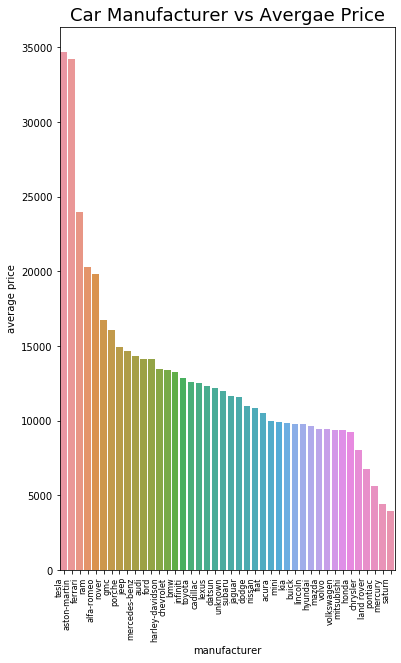

In [32]:
# plot the avg price vs manufature
temp = (df_new.groupby(['manufacturer'])['price']).mean().sort_values(ascending=False)
temp_df = pd.DataFrame({'manufacturer':temp.index,'average price':temp.values})
plt.figure(figsize=(6,10))
ax = snb.barplot(x='manufacturer', y='average price', data=temp_df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=8);
plt.title("Car Manufacturer vs Avergae Price",fontdict={'fontsize':18});
plt.savefig('../Report/figures/6_3.png')

In [94]:
df_new.columns

Index(['region', 'price', 'year', 'manufacturer', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'type', 'paint_color',
       'state', 'lat', 'long'],
      dtype='object')

At this point, we did all the EDA. There are still some columns that unnecessary for machine learning, we shall drop them

In [95]:
dp_col = ['region','state','lat','long']
df_final = df_new.drop(columns=dp_col)
df_final.shape

(470174, 11)

In [102]:
# we may choose a subset of it, for faster machine learning tasks 
# choose 100000 samples of the whole dataset
# df_subset = df_final.sample(n=100000)
# print(df_subset.shape)
# df_subset.head()

(50000, 11)


,price,year,manufacturer,condition,cylinders,fuel,odometer,transmission,drive,type,paint_color
69427,4700,2010.0,toyota,unknown,4,gas,150000.0,automatic,unknown,unknown,unknown
423402,8990,2014.0,jeep,like new,4,gas,69000.0,automatic,unknown,unknown,grey
358877,18875,2017.0,ford,excellent,4,gas,51492.0,automatic,4wd,sedan,black
523239,8000,2010.0,honda,excellent,4,gas,68000.0,automatic,fwd,sedan,brown
88541,4000,2013.0,unknown,excellent,4,gas,200000.0,automatic,fwd,unknown,white


In [103]:
# save the subset of the dataframe for further use
# df_subset.to_csv('subset.csv',index=False)